In [1]:
import pandas as pd

try:
    df_walmart = pd.read_csv('Walmart.csv')
    display(df_walmart.head())
    print(df_walmart.shape)
except FileNotFoundError:
    print("Error: 'Walmart.csv' not found. Please ensure the file exists in the current directory.")
except Exception as e:
    print(f"An error occurred: {e}")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


(6435, 8)


In [2]:
# Handle missing values
for col in df_walmart.columns:
    if df_walmart[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df_walmart[col]):
            df_walmart[col].fillna(df_walmart[col].median(), inplace=True)
        else:
            df_walmart[col].fillna(df_walmart[col].mode()[0], inplace=True)

# Remove duplicates
df_walmart.drop_duplicates(inplace=True)

# Handle outliers in numerical features
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for col in numerical_cols:
    Q1 = df_walmart[col].quantile(0.25)
    Q3 = df_walmart[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_walmart = df_walmart[(df_walmart[col] >= lower_bound) & (df_walmart[col] <= upper_bound)]

# Standardize 'Date' column
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'], format='%d-%m-%Y')

# Check for inconsistencies in categorical columns (example for 'Store')
if not pd.api.types.is_numeric_dtype(df_walmart['Store']):
    print("Error: 'Store' column is not numeric. Check for inconsistencies and convert if needed.")
if not pd.api.types.is_numeric_dtype(df_walmart['Holiday_Flag']):
    print("Error: 'Holiday_Flag' column is not numeric. Check for inconsistencies and convert if needed.")

display(df_walmart.head())

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_walmart.shape)

# Check data types and correct if necessary
print("\nData Types:\n", df_walmart.dtypes)

if not pd.api.types.is_numeric_dtype(df_walmart['Store']):
    df_walmart['Store'] = pd.to_numeric(df_walmart['Store'], errors='coerce')
if not pd.api.types.is_numeric_dtype(df_walmart['Holiday_Flag']):
    df_walmart['Holiday_Flag'] = pd.to_numeric(df_walmart['Holiday_Flag'], errors='coerce')

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:\n", df_walmart.describe())

# Compute the frequency of unique values for categorical features
print("\nFrequency of Unique Values for 'Holiday_Flag':\n", df_walmart['Holiday_Flag'].value_counts())
print("\nFrequency of Unique Values for 'Store':\n", df_walmart['Store'].value_counts())

Shape of the DataFrame: (5917, 8)

Data Types:
 Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Descriptive Statistics for Numerical Features:
              Store                           Date  Weekly_Sales  Holiday_Flag  \
count  5917.000000                           5917  5.917000e+03   5917.000000   
mean     22.801251  2011-06-14 17:15:31.485550080  1.039313e+06      0.069123   
min       1.000000            2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      11.000000            2010-10-08 00:00:00  5.525292e+05      0.000000   
50%      22.000000            2011-06-10 00:00:00  9.472292e+05      0.000000   
75%      34.000000            2012-02-17 00:00:00  1.427624e+06      0.000000   
max      45.000000            2012-10-26 00:00:00  2.685352e+06      1.000

             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  5917.000000                           5917  5.917000e+03   5917.000000   
mean     22.801251  2011-06-14 17:15:31.485550080  1.039313e+06      0.069123   
min       1.000000            2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      11.000000            2010-10-08 00:00:00  5.525292e+05      0.000000   
50%      22.000000            2011-06-10 00:00:00  9.472292e+05      0.000000   
75%      34.000000            2012-02-17 00:00:00  1.427624e+06      0.000000   
max      45.000000            2012-10-26 00:00:00  2.685352e+06      1.000000   
std      13.094060                            NaN  5.519450e+05      0.253684   

       Temperature   Fuel_Price          CPI  Unemployment  
count  5917.000000  5917.000000  5917.000000   5917.000000  
mean     60.433407     3.340543   175.023148      7.722305  
min       7.460000     2.472000   126.064000      4.308000  
25%      46.980000     2.8

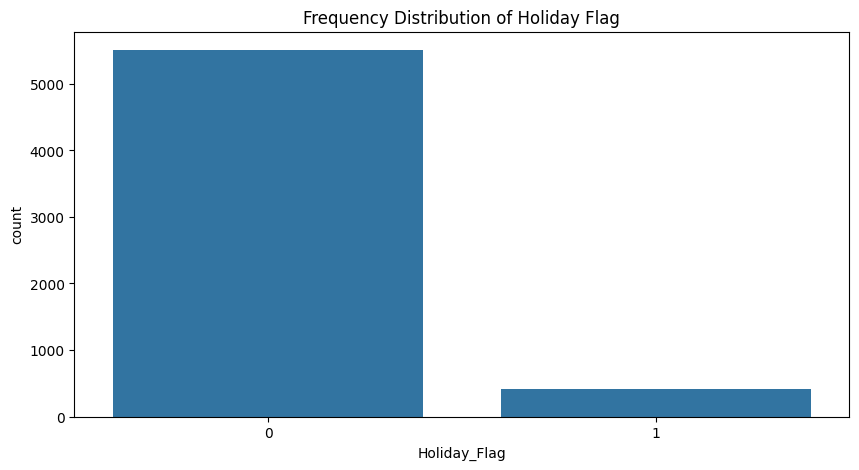

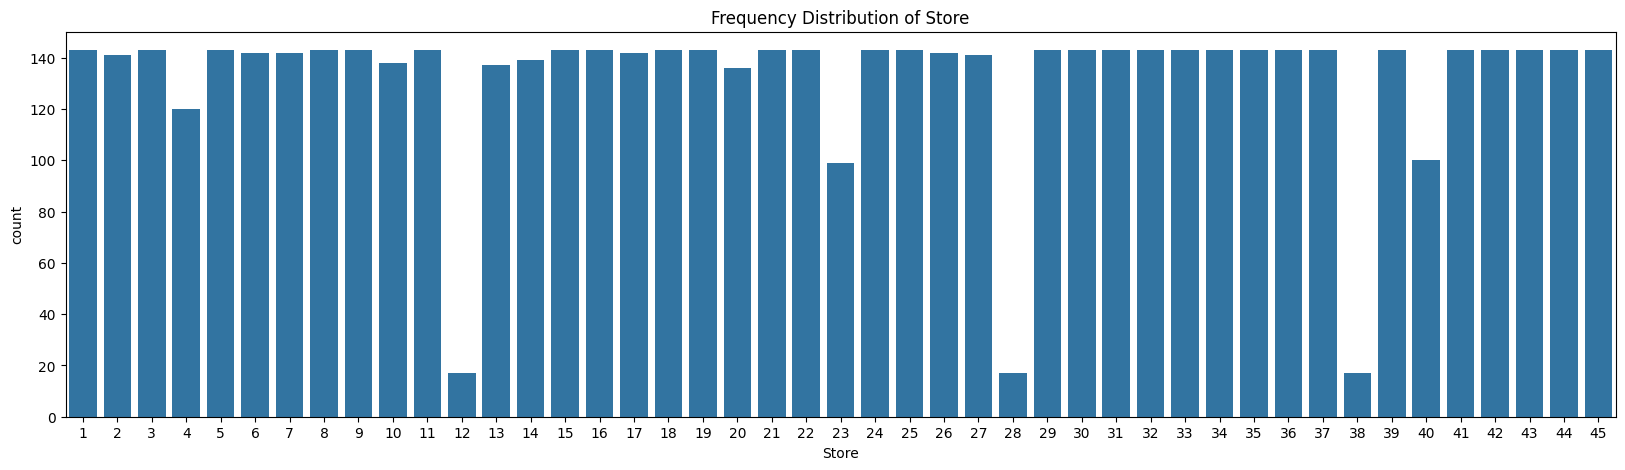

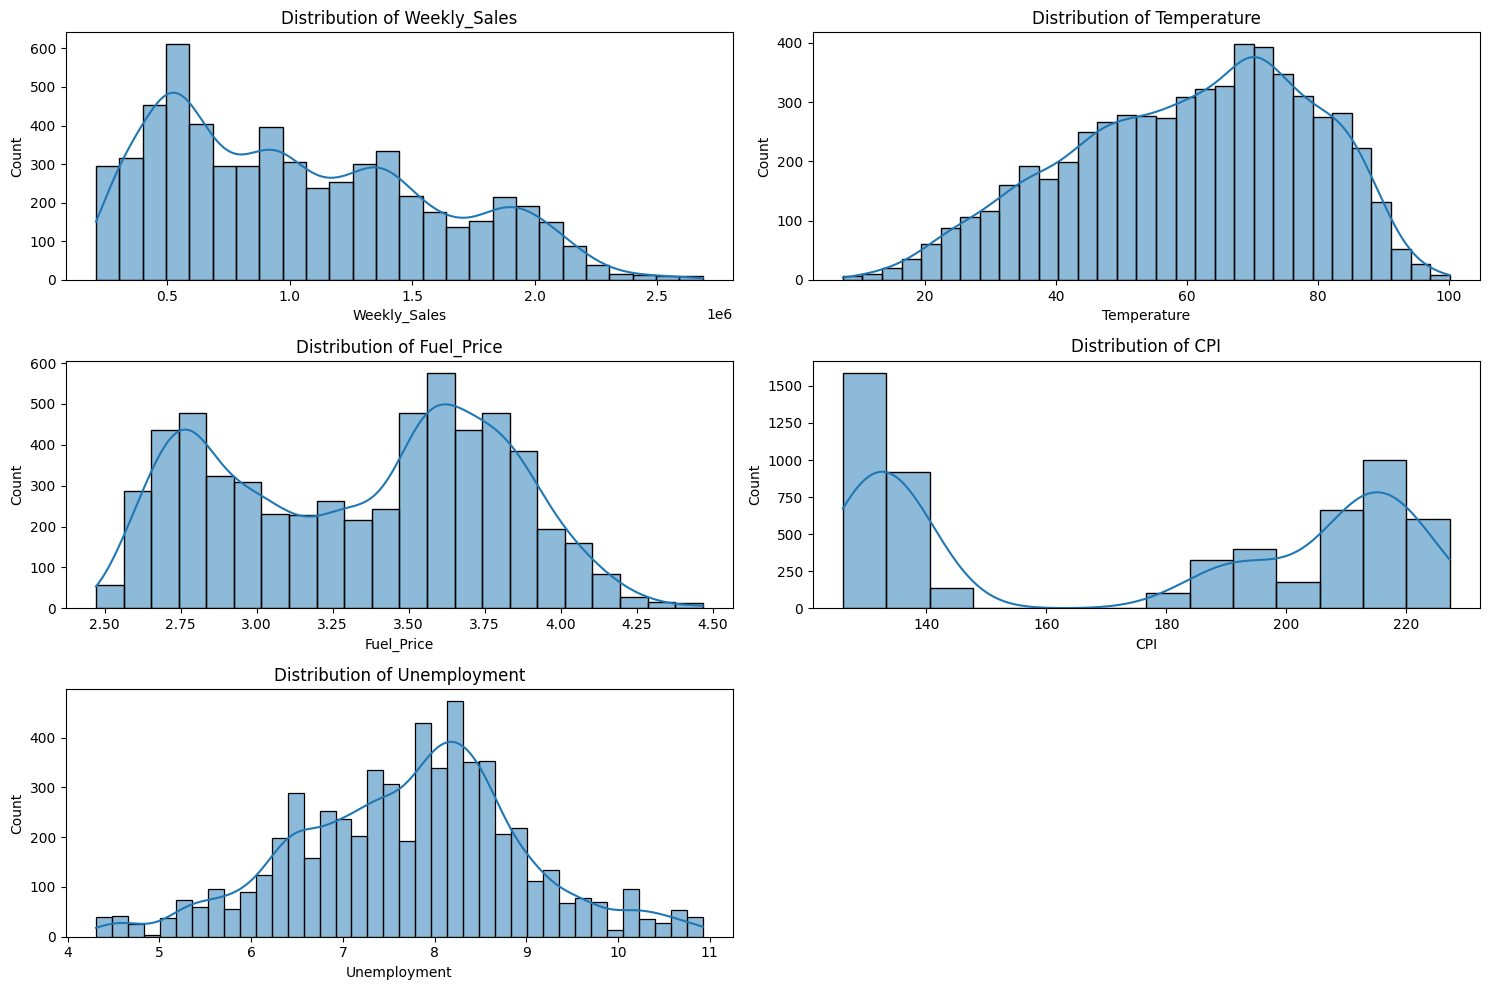

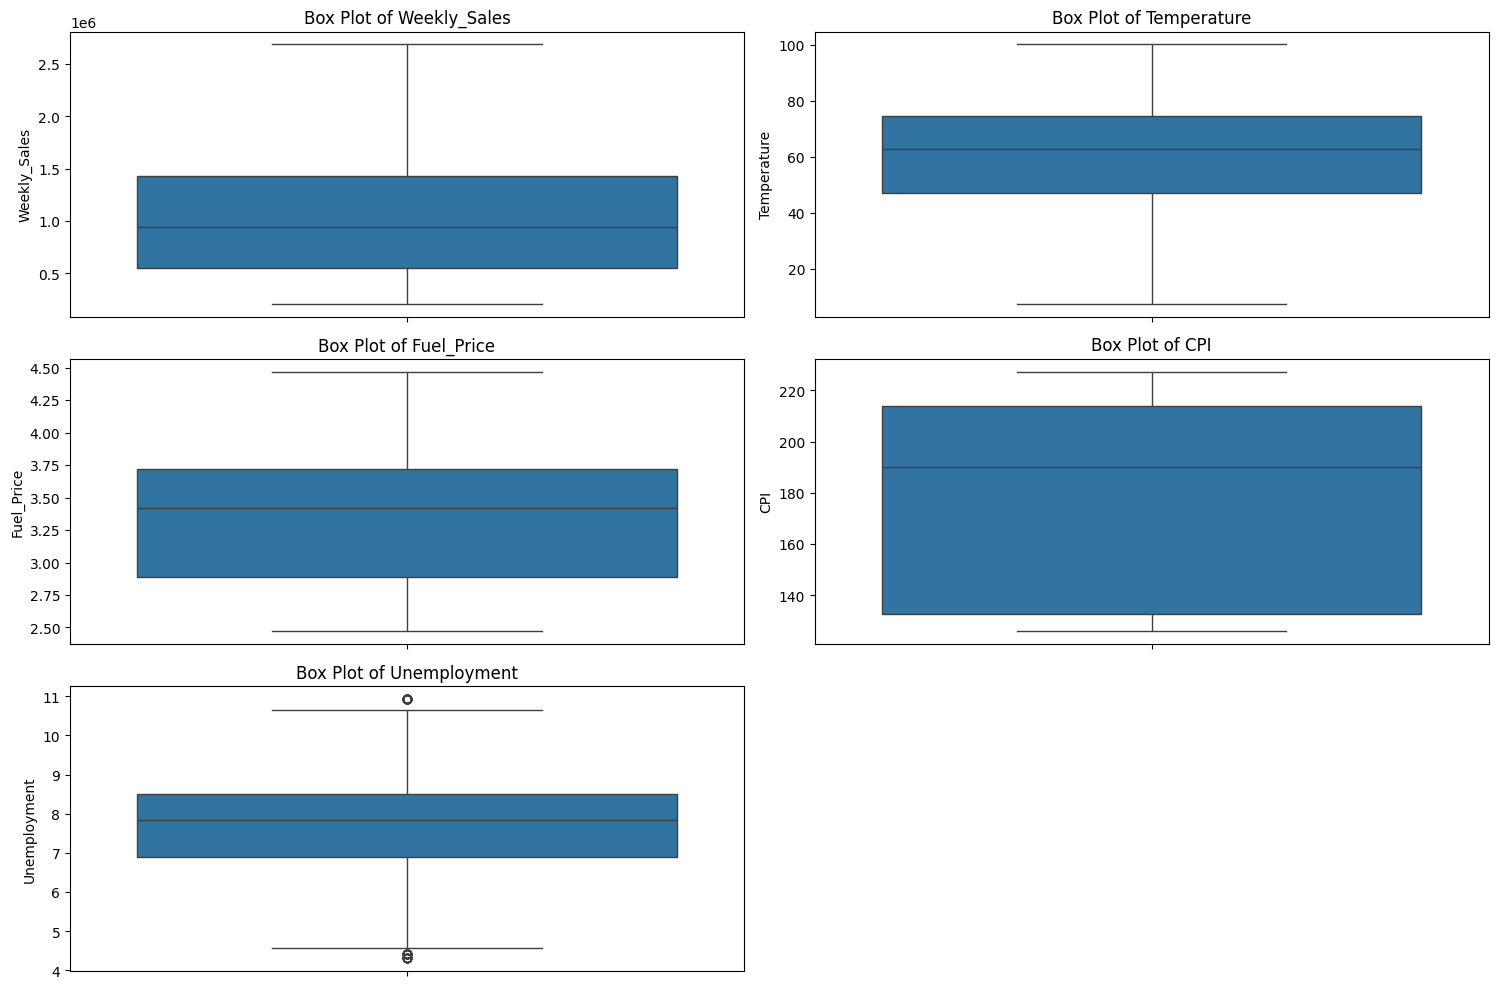

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
print(df_walmart.describe())

# Frequency distributions for categorical features
print("\nFrequency of Holiday Flag:\n", df_walmart['Holiday_Flag'].value_counts())
print("\nFrequency of Store:\n", df_walmart['Store'].value_counts())
plt.figure(figsize=(10, 5))
sns.countplot(x='Holiday_Flag', data=df_walmart)
plt.title('Frequency Distribution of Holiday Flag')
plt.show()
plt.figure(figsize=(20, 5))
sns.countplot(x='Store', data=df_walmart)
plt.title('Frequency Distribution of Store')
plt.show()

# Visualize distributions of numerical features
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_walmart[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df_walmart[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

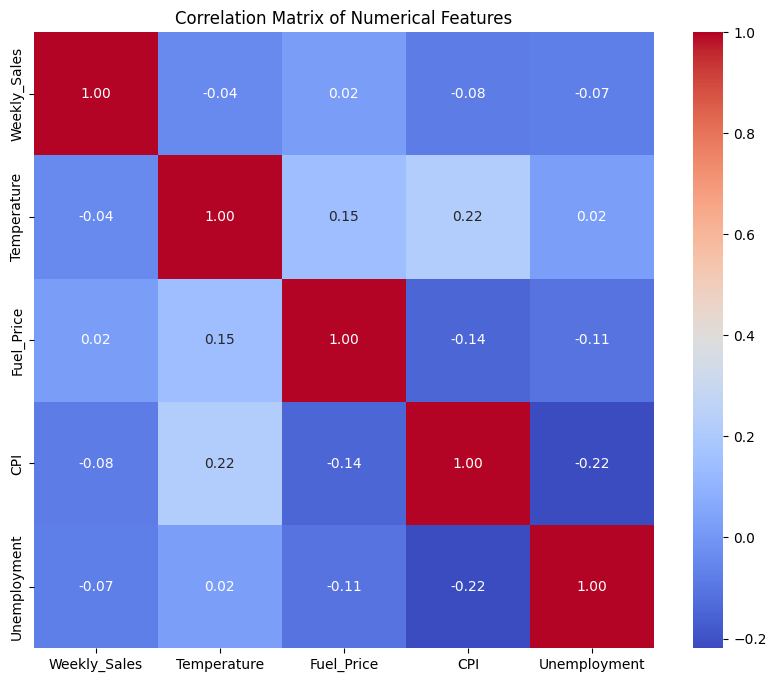

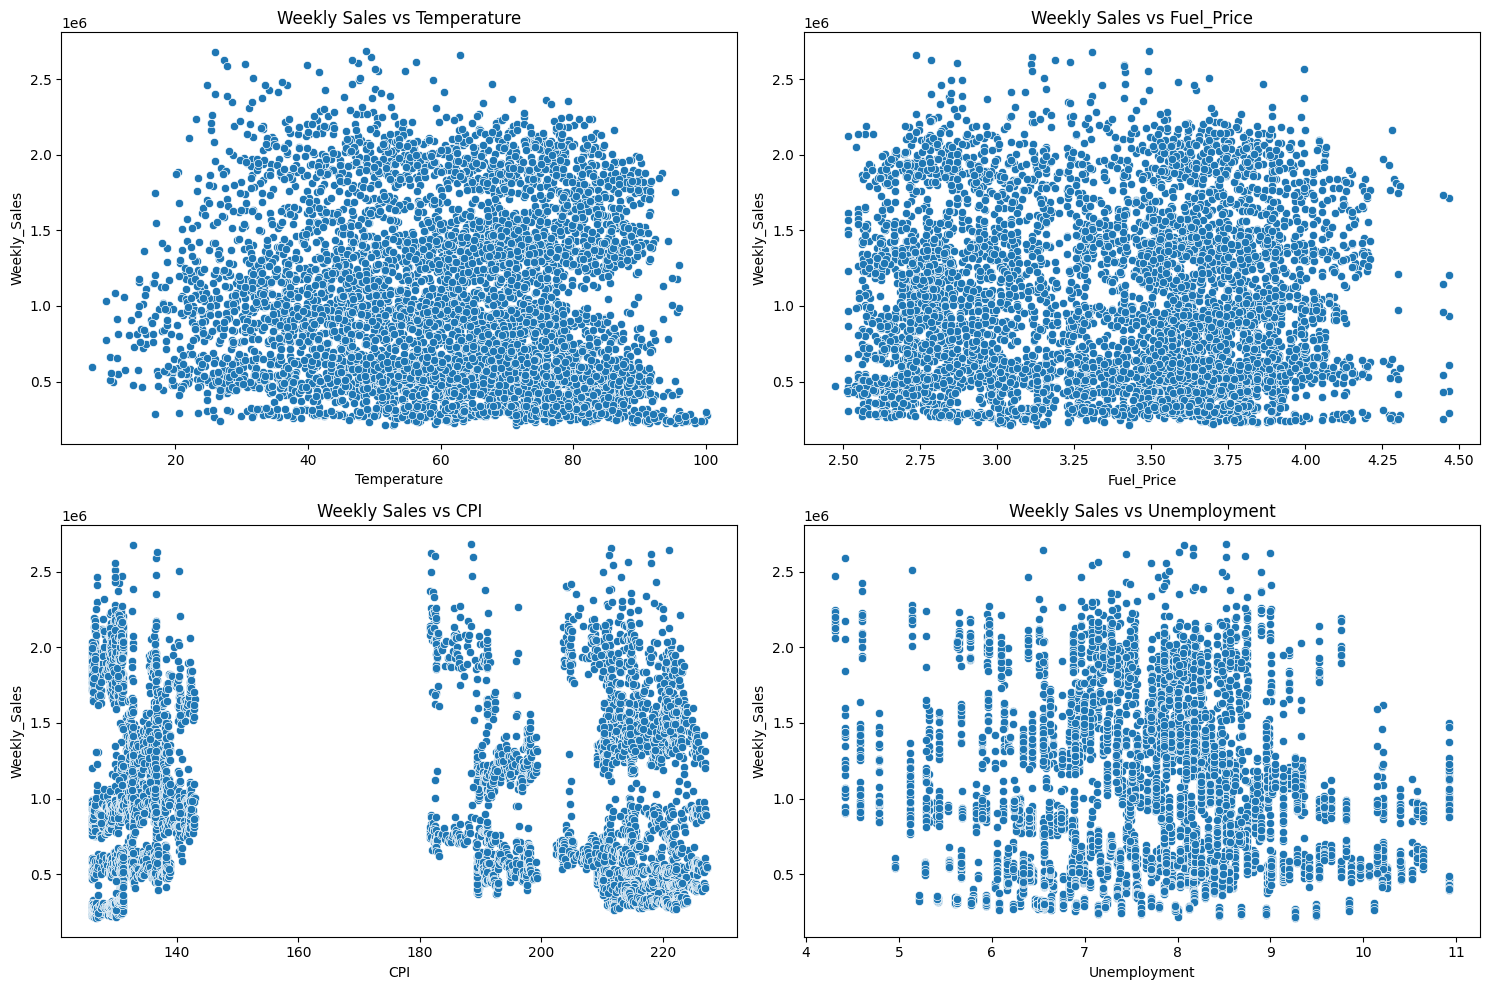

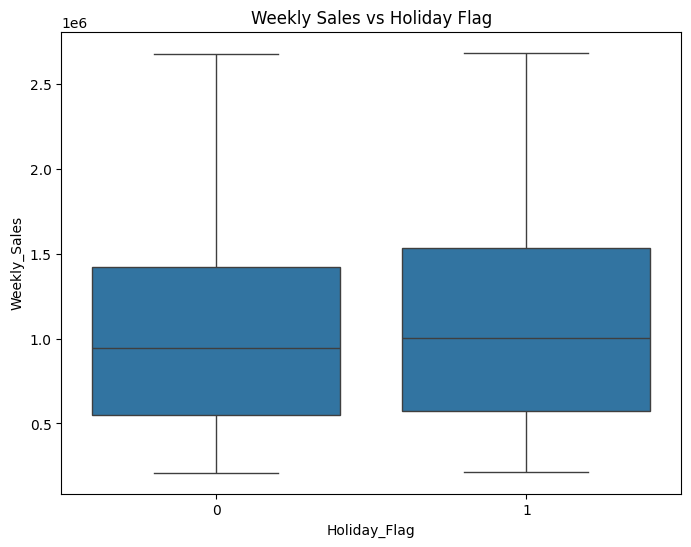

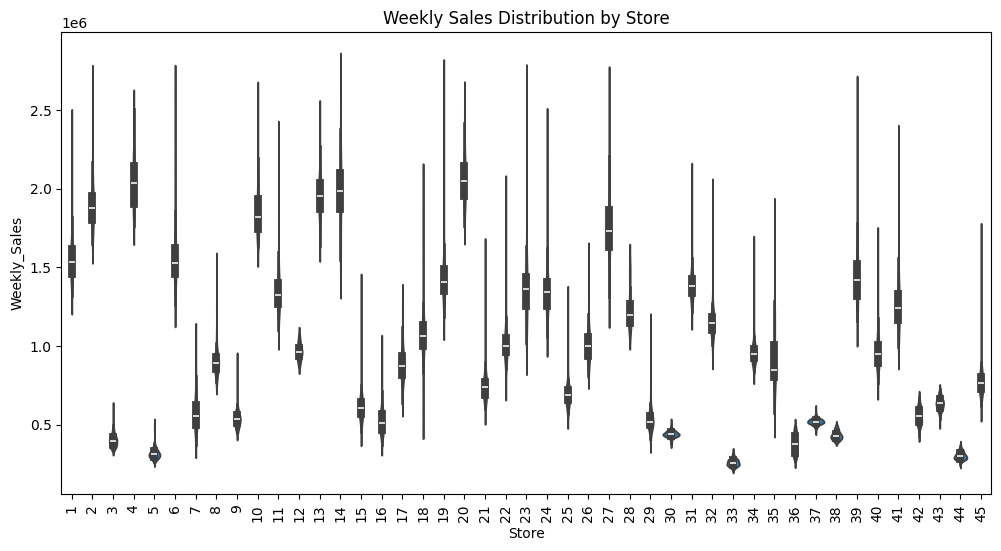

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix and heatmap
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = df_walmart[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=col, y='Weekly_Sales', data=df_walmart)
    plt.title(f'Weekly Sales vs {col}')
plt.tight_layout()
plt.show()

# Box plot for Holiday_Flag
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df_walmart)
plt.title('Weekly Sales vs Holiday Flag')
plt.show()

# Violin plot for Store
plt.figure(figsize=(12, 6))
sns.violinplot(x='Store', y='Weekly_Sales', data=df_walmart)
plt.title('Weekly Sales Distribution by Store')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

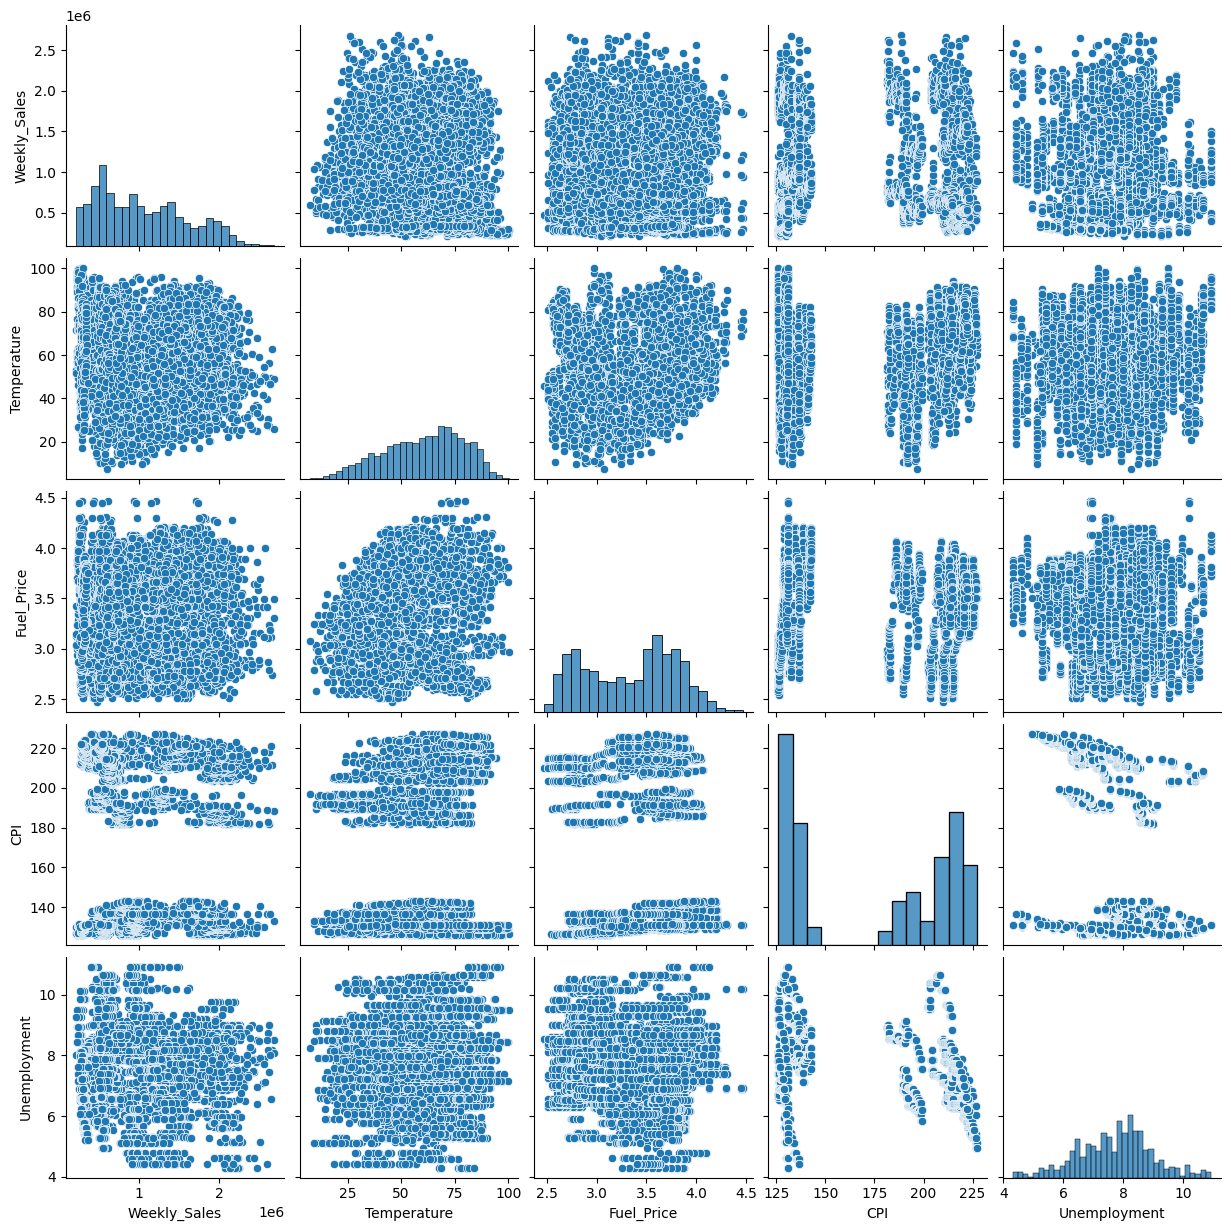

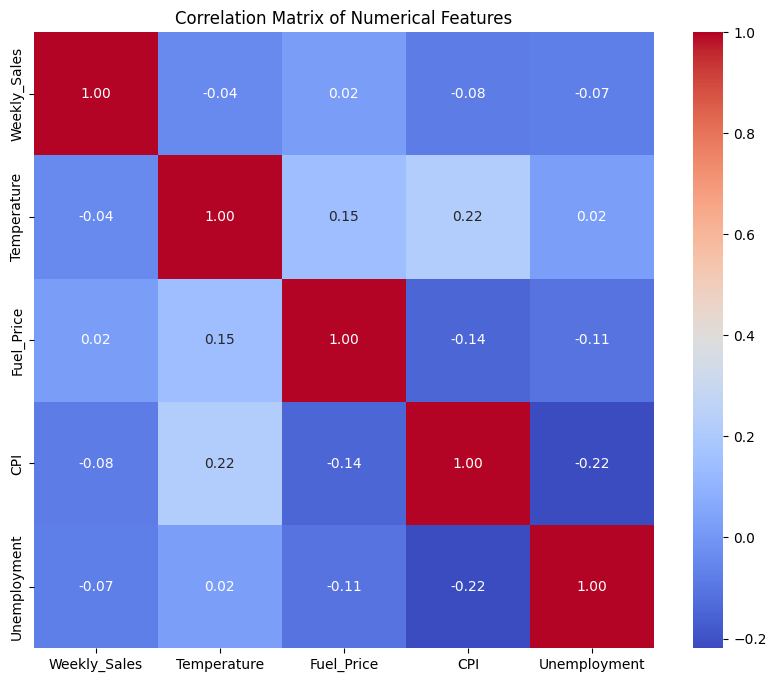

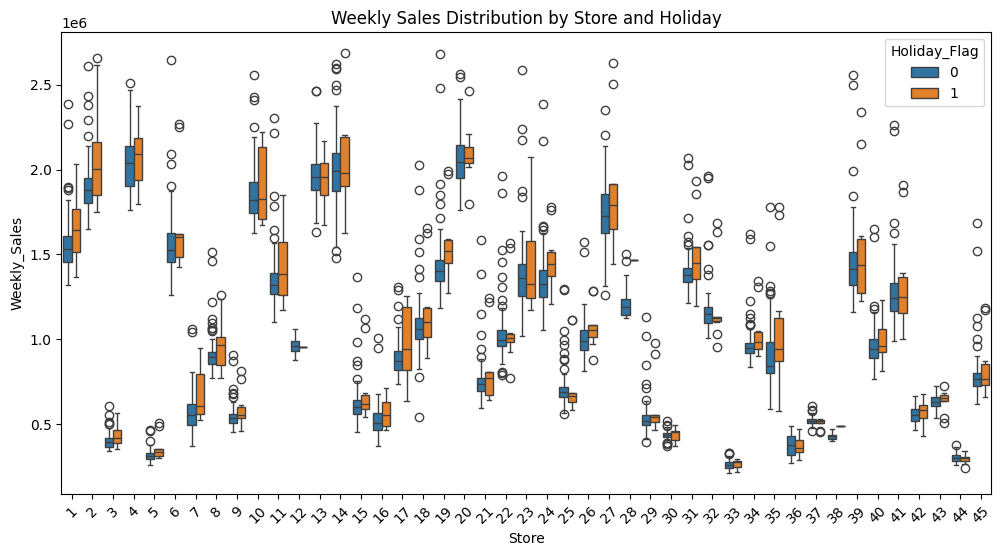

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plots
sns.pairplot(df_walmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_walmart[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Grouped comparisons (example: Weekly_Sales vs Store during Holiday periods)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=df_walmart)
plt.title('Weekly Sales Distribution by Store and Holiday')
plt.xticks(rotation=45)
plt.show()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory to save plots if it doesn't exist
output_dir = "visualization_results"
os.makedirs(output_dir, exist_ok=True)

# Univariate Analysis Visualizations
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
categorical_features = ['Holiday_Flag', 'Store']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_walmart[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(os.path.join(output_dir, f'{col}_histogram.png'))
    plt.close()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_walmart[col])
    plt.title(f'Box Plot of {col}')
    plt.savefig(os.path.join(output_dir, f'{col}_boxplot.png'))
    plt.close()

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_walmart)
    plt.title(f'Frequency Distribution of {col}')
    plt.savefig(os.path.join(output_dir, f'{col}_barplot.png'))
    plt.close()

# Bivariate Analysis Visualizations
correlation_matrix = df_walmart[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(os.path.join(output_dir, 'correlation_heatmap.png'))
plt.close()

for col in numerical_features:
    if col != 'Weekly_Sales':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=col, y='Weekly_Sales', data=df_walmart)
        plt.title(f'Weekly Sales vs {col}')
        plt.savefig(os.path.join(output_dir, f'Weekly_Sales_vs_{col}_scatter.png'))
        plt.close()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df_walmart)
plt.title('Weekly Sales vs Holiday Flag')
plt.savefig(os.path.join(output_dir, 'Weekly_Sales_vs_Holiday_boxplot.png'))
plt.close()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Store', y='Weekly_Sales', data=df_walmart)
plt.title('Weekly Sales Distribution by Store')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'Weekly_Sales_by_Store_violin.png'))
plt.close()

# Multivariate Analysis Visualizations
sns.pairplot(df_walmart[numerical_features])
plt.savefig(os.path.join(output_dir, 'pairplot_numerical_features.png'))
plt.close()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(os.path.join(output_dir, 'correlation_matrix_heatmap.png'))
plt.close()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=df_walmart)
plt.title('Weekly Sales Distribution by Store and Holiday')
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_dir, 'Weekly_Sales_by_Store_Holiday_boxplot.png'))
plt.close()